## Packages
* ### Here is where packages are imported to:...
 - read our data from the CSV file
 - manipulate it for conversion into a suitable format
 - create visualizations for the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data description
- #### We read our dataset into a pandas dataframe
 - we use .head() to show the first five records.

In [2]:
ytDF = pd.read_csv('USvideos.csv')
print(ytDF.head())

      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   lik

In [3]:
ytDF.shape

(40949, 16)

In [4]:
ytDF.drop('video_id', axis=1, inplace=True)
ytDF.drop('title', axis=1, inplace=True)
ytDF.drop('publish_time', axis=1, inplace=True)
ytDF.drop('tags', axis=1, inplace=True)
ytDF.drop('thumbnail_link', axis=1, inplace=True)
ytDF.drop('video_error_or_removed', axis=1, inplace=True)
ytDF.drop('description', axis=1, inplace=True)

In [5]:
ytDF.head()

,trending_date,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,17.14.11,CaseyNeistat,22,748374,57527,2966,15954,False,False
1,17.14.11,LastWeekTonight,24,2418783,97185,6146,12703,False,False
2,17.14.11,Rudy Mancuso,23,3191434,146033,5339,8181,False,False
3,17.14.11,Good Mythical Morning,24,343168,10172,666,2146,False,False
4,17.14.11,nigahiga,24,2095731,132235,1989,17518,False,False


                   category_id     views     likes  dislikes  comment_count  \
category_id           1.000000 -0.168231 -0.173921 -0.033547      -0.076307   
views                -0.168231  1.000000  0.849177  0.472213       0.617621   
likes                -0.173921  0.849177  1.000000  0.447186       0.803057   
dislikes             -0.033547  0.472213  0.447186  1.000000       0.700184   
comment_count        -0.076307  0.617621  0.803057  0.700184       1.000000   
comments_disabled     0.048949  0.002677 -0.028918 -0.004431      -0.028277   
ratings_disabled     -0.013506  0.015355 -0.020888 -0.008230      -0.013819   

                   comments_disabled  ratings_disabled  
category_id                 0.048949         -0.013506  
views                       0.002677          0.015355  
likes                      -0.028918         -0.020888  
dislikes                   -0.004431         -0.008230  
comment_count              -0.028277         -0.013819  
comments_disabled        

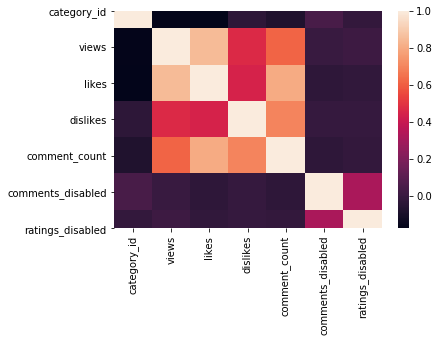

In [6]:
corr = ytDF.corr()
print(corr)
sns.heatmap(corr,
           xticklabels=corr.columns,
           yticklabels=corr.columns)

In [7]:
ytCH = pd.DataFrame(ytDF.channel_title)
#threshold = 100
#vc = ytCH.stack().value_counts()
#to_remove = vc[vc <= threshold].index
#ytCH.replace(to_remove, np.nan, inplace=True)
sr = pd.Series(ytCH.channel_title)
#sr.value_counts()
ryCH = pd.DataFrame(sr.value_counts().reset_index())
ryCH.columns = ['channel_title', 'count']
print(ryCH)

                               channel_title  count
0                                       ESPN    203
1     The Tonight Show Starring Jimmy Fallon    197
2                                    Netflix    193
3                                        Vox    193
4                               TheEllenShow    193
...                                      ...    ...
2202                            Skelly Robot      1
2203                           King Princess      1
2204                           JarJar Abrams      1
2205                           Dean Anderson      1
2206                                   Grist      1

[2207 rows x 2 columns]


In [8]:
viewCH = pd.DataFrame({
    "channel_title": ytDF.channel_title, 
    "views": ytDF.views})
rvCH = pd.pivot_table(viewCH, index='channel_title',aggfunc=sum)
rvCH = pd.DataFrame(rvCH)
rvCH.sort_values(by=['views'], ascending=False)

,views
channel_title,
ChildishGambinoVEVO,3758488765
ibighit,2235906679
Dude Perfect,1870085178
Marvel Entertainment,1808998971
ArianaGrandeVevo,1576959172
...,...
CHauserable,1807
Total Combat,1722
OjO Commuter Scooter by OjO Electric,1706


In [9]:
merged = pd.merge(ryCH,rvCH, on='channel_title')
merged.head()

,channel_title,count,views
0,ESPN,203,105654218
1,The Tonight Show Starring Jimmy Fallon,197,271426383
2,Netflix,193,185818315
3,Vox,193,122633963
4,TheEllenShow,193,253841999


In [10]:
likeCH = pd.DataFrame({
    "channel_title": ytDF.channel_title, 
    "likes": ytDF.likes})
rlCH = pd.pivot_table(likeCH, index='channel_title',aggfunc=sum)
rlCH = pd.DataFrame(rlCH)
rlCH.sort_values(by=['likes'], ascending=False)

,likes
channel_title,
ibighit,199247121
ChildishGambinoVEVO,96700818
Dude Perfect,60275557
Marvel Entertainment,55873344
ArianaGrandeVevo,52170970
...,...
Coachella,0
chris lee,0
cheeseandjamsandwich,0


In [11]:
merged = pd.merge(merged,rlCH, on='channel_title')
merged.head()

,channel_title,count,views,likes
0,ESPN,203,105654218,937723
1,The Tonight Show Starring Jimmy Fallon,197,271426383,5981334
2,Netflix,193,185818315,4211072
3,Vox,193,122633963,3272518
4,TheEllenShow,193,253841999,6035132


In [12]:
dislCH = pd.DataFrame({
    "channel_title": ytDF.channel_title, 
    "dislikes": ytDF.dislikes})
rdCH = pd.pivot_table(dislCH, index='channel_title',aggfunc=sum)
rdCH = pd.DataFrame(rdCH)
rdCH.sort_values(by=['dislikes'], ascending=False)

,dislikes
channel_title,
Logan Paul Vlogs,13847251
YouTube Spotlight,10924092
ChildishGambinoVEVO,6054434
Call of Duty,5644083
ibighit,3467306
...,...
Audience Network,0
negermano,0
Tentmaker Pictures,0


In [13]:
merged = pd.merge(merged,rdCH, on='channel_title')
merged.head()

,channel_title,count,views,likes,dislikes
0,ESPN,203,105654218,937723,108043
1,The Tonight Show Starring Jimmy Fallon,197,271426383,5981334,187407
2,Netflix,193,185818315,4211072,196212
3,Vox,193,122633963,3272518,615977
4,TheEllenShow,193,253841999,6035132,193602


In [14]:
comCH = pd.DataFrame({
    "channel_title": ytDF.channel_title, 
    "comment_count": ytDF.comment_count})
rcCH = pd.pivot_table(comCH, index='channel_title',aggfunc=sum)
rcCH = pd.DataFrame(rcCH)
rcCH.sort_values(by=['comment_count'], ascending=False)

,comment_count
channel_title,
ibighit,31817464
Logan Paul Vlogs,14870370
ChildishGambinoVEVO,10151289
jypentertainment,7575510
YouTube Spotlight,6495154
...,...
Steve Kovach,0
Sprint,0
Southwest Florida Eagle Cam,0


In [15]:
merged = pd.merge(merged,rcCH, on='channel_title')
merged.head()

,channel_title,count,views,likes,dislikes,comment_count
0,ESPN,203,105654218,937723,108043,387753
1,The Tonight Show Starring Jimmy Fallon,197,271426383,5981334,187407,403655
2,Netflix,193,185818315,4211072,196212,391350
3,Vox,193,122633963,3272518,615977,558845
4,TheEllenShow,193,253841999,6035132,193602,344469


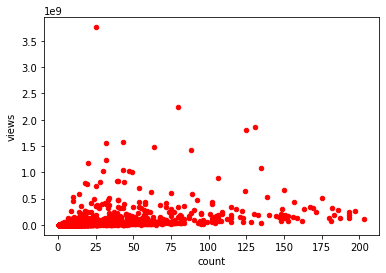

In [16]:
merged.plot.scatter(x='count',
                    y='views',
                    c='Red')

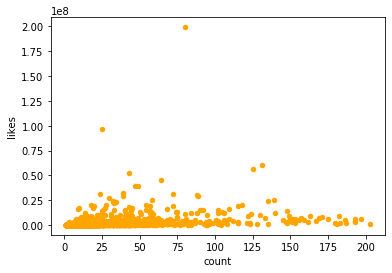

In [17]:
merged.plot.scatter(x='count',
                    y='likes',
                    c='Orange')

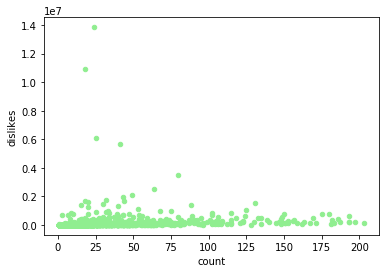

In [18]:
merged.plot.scatter(x='count',
                    y='dislikes',
                    c='LightGreen')

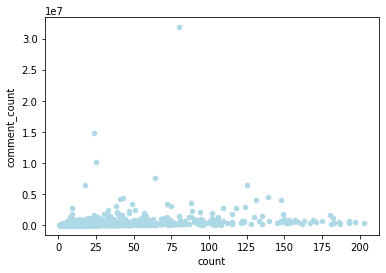

In [19]:
merged.plot.scatter(x='count',
                    y='comment_count',
                    c='LightBlue')

In [20]:
merged.corr(method ='pearson')

,count,views,likes,dislikes,comment_count
count,1.000000,0.377495,0.313246,0.169553,0.257884
views,0.377495,1.000000,0.841846,0.536699,0.668097
likes,0.313246,0.841846,1.000000,0.499068,0.903020
dislikes,0.169553,0.536699,0.499068,1.000000,0.650210
comment_count,0.257884,0.668097,0.903020,0.650210,1.000000


# Finally we start the neural network

In [21]:
itr = pd.read_csv('is-it-trending.csv')
itr.head()

,views,likes,dislikes,comment_count,Outcome
0,24028,42110,95731,2535,0
1,47981,87158,47500,58546,1
2,5402,92159,27193,95630,1
3,4690,35439,44554,64769,0
4,25191,96346,21463,15847,0


#### - Create matrix of features and matrix of target variable

In [22]:
X= pd.DataFrame({
    "views": itr.views, 
    "likes": itr.likes,
    "dislikes": itr.dislikes,
    "comment_count": itr.comment_count})

y=  pd.DataFrame({
    "Outcome": itr.Outcome})


#### - Create the training set and the test set

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

#### - scale the data and standardize

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Import required Modules

In [26]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
classifier = Sequential()

### Add layers to network

In [28]:
classifier.add(Dense(6, activation = 'relu', input_dim = 4))

classifier.add(Dense(6, activation = 'relu'))

classifier.add(Dense(1, activation = 'sigmoid'))

In [29]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train

In [30]:
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Train on 199 samples
Epoch 1/100
199/199 [==============================] - 1s 3ms/sample - loss: 0.7715 - accuracy: 0.4824
Epoch 2/100
199/199 [==============================] - 0s 150us/sample - loss: 0.7415 - accuracy: 0.5126
Epoch 3/100
199/199 [==============================] - 0s 167us/sample - loss: 0.7177 - accuracy: 0.5528
Epoch 4/100
199/199 [==============================] - 0s 165us/sample - loss: 0.6994 - accuracy: 0.5930
Epoch 5/100
199/199 [==============================] - 0s 175us/sample - loss: 0.6816 - accuracy: 0.6231
Epoch 6/100
199/199 [==============================] - 0s 170us/sample - loss: 0.6675 - accuracy: 0.6382
Epoch 7/100
199/199 [==============================] - 0s 175us/sample - loss: 0.6546 - accuracy: 0.6482
Epoch 8/100
199/199 [==============================] - 0s 160us/sample - loss: 0.6430 - accuracy: 0.6633
Epoch 9/100
199/199 [==============================] - 0s 165us/sample - loss: 0.6321 - accuracy: 0.6683
Epoch 10/100
199/199 [==============

In [31]:
val_loss, val_acc = classifier.evaluate(X_test, y_test)
print(val_loss, val_acc)

50/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================